### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', index_col=0)

In [4]:
df.head()

,x1,x2,y
0,-4.626272,-6.658988,0
1,-7.789640,0.262519,0
2,-8.739678,1.537758,0
3,-2.546441,-7.705224,0
4,-2.751506,-7.940187,0


Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

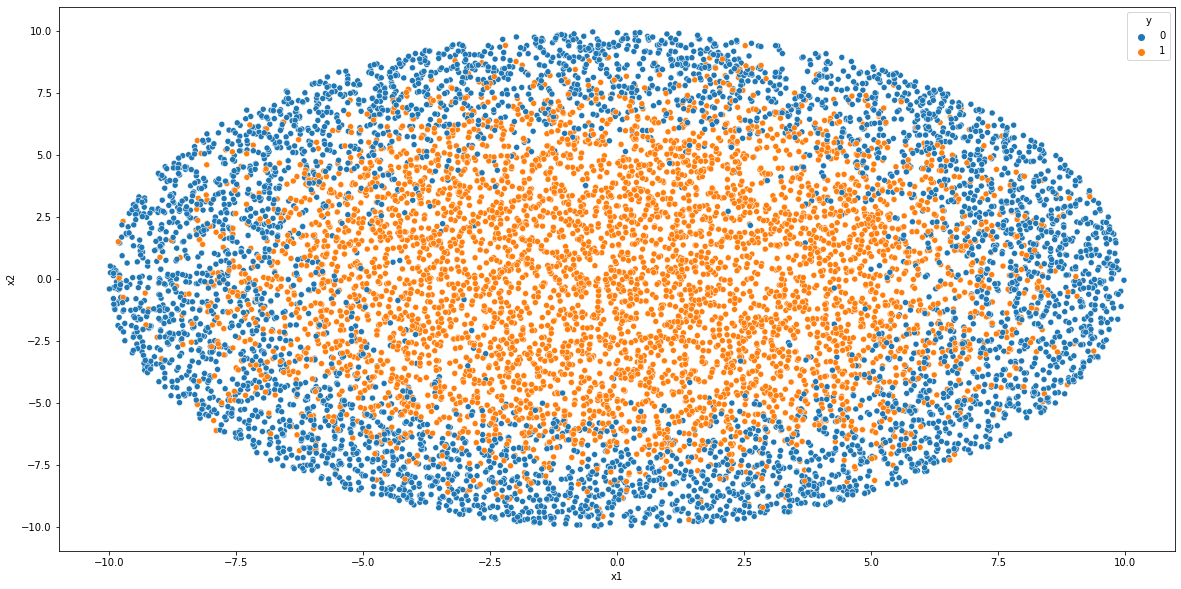

In [3]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

1. Нет - выборка двухмерная, провести границу так, чтобы объекты рыжего класса не попадали к объектам синего класса, невозможно, ну только если сделать очень переобученное дерево (но зачем). Правда, если нас интересует только точность определения объектов рыжего класса, то это можно (с сильной потерей реколла)
2. <s>Почему она такая ровно-овальная</s>
3. Нелинейные, то есть деревья (или нейронки)

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5521212121212121


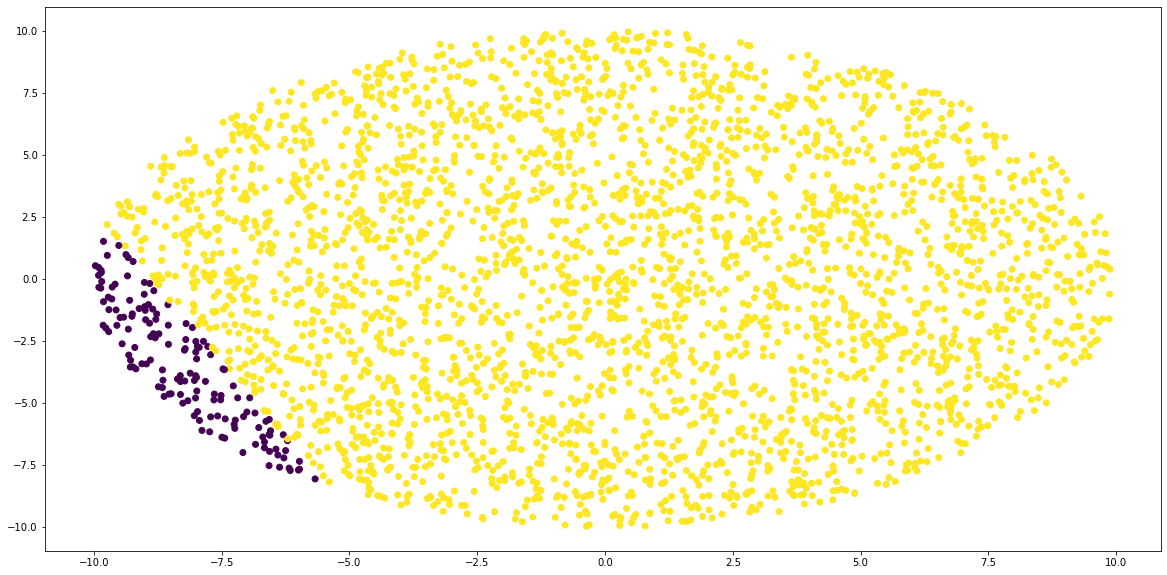

In [21]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predict_logit = logreg.predict(X_test)
predict_log_proba = [np.argmax(x) for x in logreg.predict_proba(X_test)]

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_log_proba)
plt.show()

Фигня какая-то получилась... если это то, что надо было визуализировать - просто с predict_proba ничего не хотело строиться из-за размерности массива

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.6578787878787878


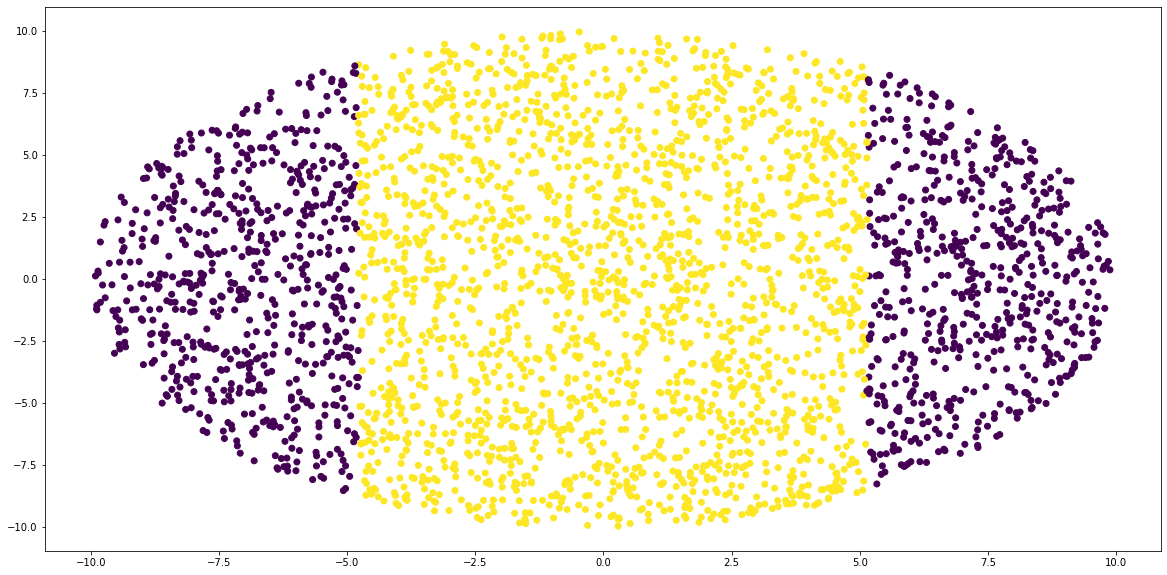

In [22]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df_new['x1'].apply(lambda x: x ** 2) # типа нелинейности немношк

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

logreg = LogisticRegression()
logreg.fit(X_train_new, y_train_new)
predict_logit = logreg.predict(X_test_new)
predict_log_proba = [np.argmax(x) for x in logreg.predict_proba(X_test_new)]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

ПЕРЕОБУЧЕНИЕ.... дерево мне щас всю выборку просто выучит

но я его постригу

Точность нашей модели 0.803939393939394


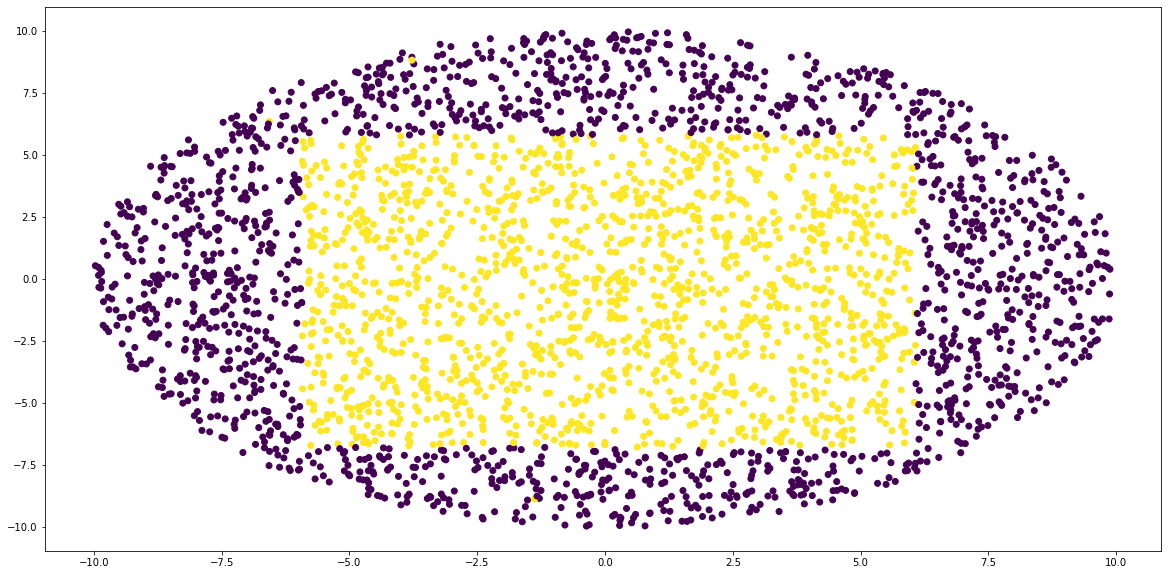

In [23]:
from sklearn.tree import DecisionTreeClassifier

#########################################

xmastree = DecisionTreeClassifier(max_depth=5) # ну например, можно погридсерчить
xmastree.fit(X_train, y_train)
predict_tree = xmastree.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = [np.argmax(x) for x in xmastree.predict_proba(X_test)]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

predict_forest = # ...
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = # ...

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [ ]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы

In [ ]:
#########################################
# Ваш код

predict_neural = # ...
predict_classes = # ...

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)